# Importing classes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading the dataset and doing some preprocessing

In [2]:
dataset_path = 'Customer Churn predection dataset/Churn_Modelling.csv'

In [3]:
my_data = pd.read_csv(dataset_path)

In [4]:
my_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
my_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Check for missing values
my_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

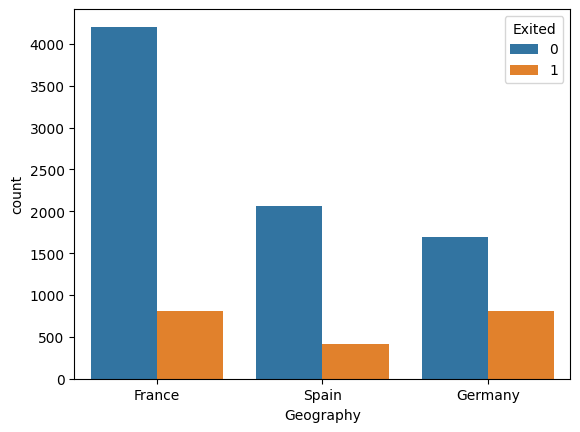

In [8]:
sns.countplot(x='Geography',hue='Exited',data=my_data)
plt.show()

In [9]:
# Encode categorical variables using one-hot encoding
my_data = pd.get_dummies(my_data, columns=['Geography', 'Gender'], drop_first=False)

In [10]:
# Feature Engineering
# Create a new feature for customer tenure in months (assuming 'Tenure' is given in years)
my_data['TenureMonths'] = my_data['Tenure'] * 12

In [11]:
# Explore feature correlations
correlation_matrix = my_data.corr()

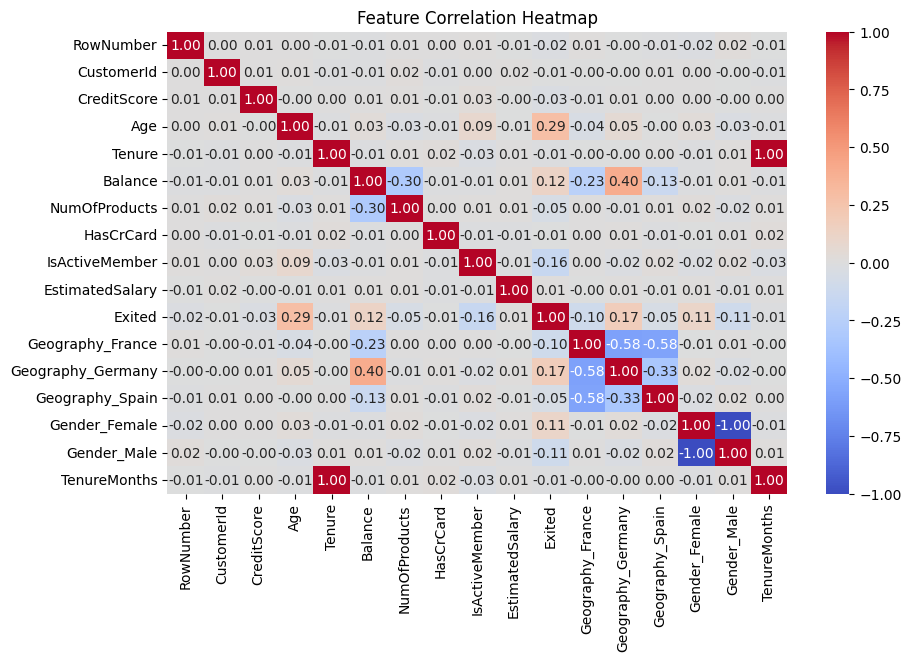

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# After Analysing the corelation between the different column and relationship of them with the Exited column, lets drop the unnecessary column and reorder them according to their corelation between them

In [13]:
my_data = my_data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Tenure'])

In [14]:
my_data = my_data.loc[:, ['CreditScore', 'Age', 'TenureMonths', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']]

In [15]:
my_data

,CreditScore,Age,TenureMonths,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,24,0.00,1,1,1,101348.88,1,0,1,0,0,1
1,608,41,12,83807.86,1,0,1,112542.58,1,0,0,0,1,0
2,502,42,96,159660.80,3,1,0,113931.57,1,0,1,0,0,1
3,699,39,12,0.00,2,0,0,93826.63,1,0,1,0,0,0
4,850,43,24,125510.82,1,1,1,79084.10,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,60,0.00,2,1,0,96270.64,0,1,1,0,0,0
9996,516,35,120,57369.61,1,1,1,101699.77,0,1,1,0,0,0
9997,709,36,84,0.00,1,0,1,42085.58,1,0,1,0,0,1
9998,772,42,36,75075.31,2,1,0,92888.52,0,1,0,1,0,1


In [16]:
# Split the dataset into features (X) and the target variable (y)
X = my_data.drop(columns=['Exited'])
y = my_data['Exited']

In [17]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [19]:
# Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Undersampling
random_undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# Fit and transform the training data
X_train_resampled_oversmapled, Y_train_resampled_oversmapled = smote.fit_resample(X_train, y_train)
X_train_resampled_Undersampled, Y_train_resampled_Undersampled = random_undersampler.fit_resample(X_train, y_train)

# Using Logistic Regression

In [20]:
logistic_regression_model = LogisticRegression(solver='saga',random_state=42)
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test)

# Using Random Forest

In [21]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Using Gradient Boosting

In [22]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Results and Discussion

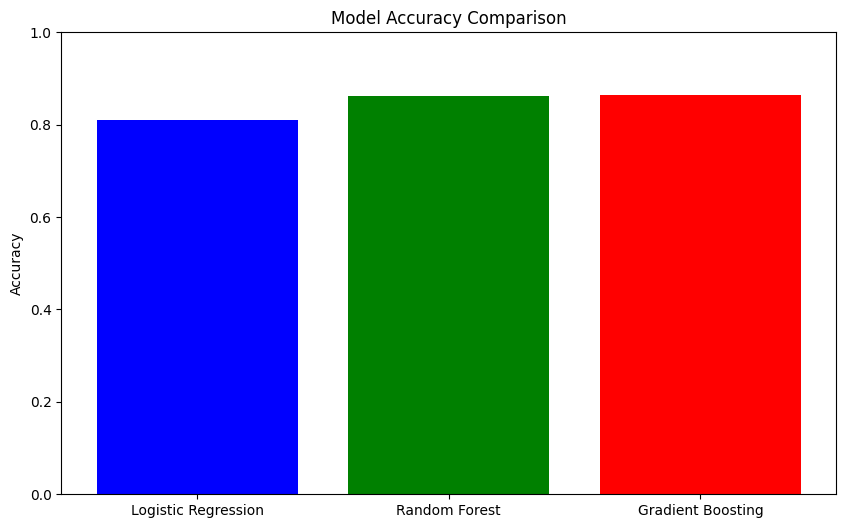

In [23]:
accuracies = [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb)]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.show()

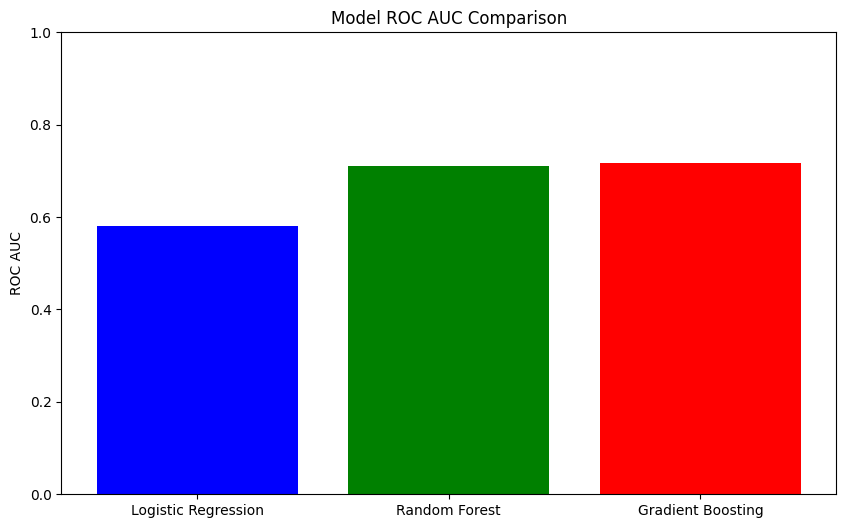

In [24]:
roc_auc_values = [roc_auc_score(y_test, y_pred_logistic), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_gb)]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

plt.figure(figsize=(10, 6))
plt.bar(model_names, roc_auc_values, color=['blue', 'green', 'red'])
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC")
plt.ylim([0, 1])
plt.show()

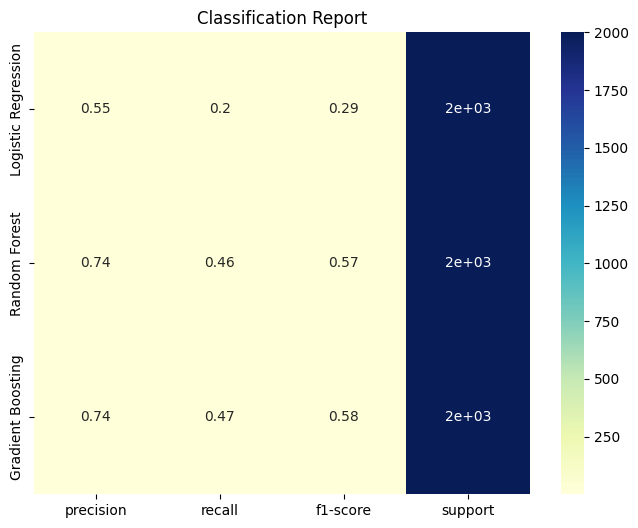

In [25]:
classification_rep_dict = {
    'Logistic Regression': {
        'precision': precision_score(y_test, y_pred_logistic),
        'recall': recall_score(y_test, y_pred_logistic),
        'f1-score': f1_score(y_test, y_pred_logistic),
        'support': len(y_test)
    },
    'Random Forest': {
        'precision': precision_score(y_test, y_pred_rf),
        'recall': recall_score(y_test, y_pred_rf),
        'f1-score': f1_score(y_test, y_pred_rf),
        'support': len(y_test)
    },
    'Gradient Boosting': {
        'precision': precision_score(y_test, y_pred_gb),
        'recall': recall_score(y_test, y_pred_gb),
        'f1-score': f1_score(y_test, y_pred_gb),
        'support': len(y_test)
    }
}

# Create a DataFrame from the dictionary
classification_rep_df = pd.DataFrame(classification_rep_dict).transpose()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(classification_rep_df, annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()

In [26]:
results_df = pd.DataFrame({
    'Original': y_test, 
    'Logistic Regression': y_pred_logistic,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb
})

In [27]:
# Saving the DataFrame to a CSV file
results_df.to_csv('predicted_results.csv', index=False)

# Conclusion 

For class 1, logistic regression produced relatively poor recall and precision. This indicates that it misses a large number of affirmative cases and produces relatively false positive mistakes. With a comparatively stronger recall for class 1, the Gradient Boosting, and Random Forest achieved a better balance between precision and recall.

Since in the Customer Churn Prediction precision is important as we want to know why peoples are leaving the bank, we would normally prioritise models with stronger Precision for class 1 (Exited) in this particular context (Customer Churn Prediction). With a slightly strong recall, F1-score, and Precision, the Gradient Boosting model seems to be the best option based on the metrics supplied.
I have tried to train the models on the oversampled data and undersampled data but it increses the recall but the precision decreases (It help in the case where the recall is necessary), so i just try to not complicate the results and train the model without them(oversampling and undersampling).